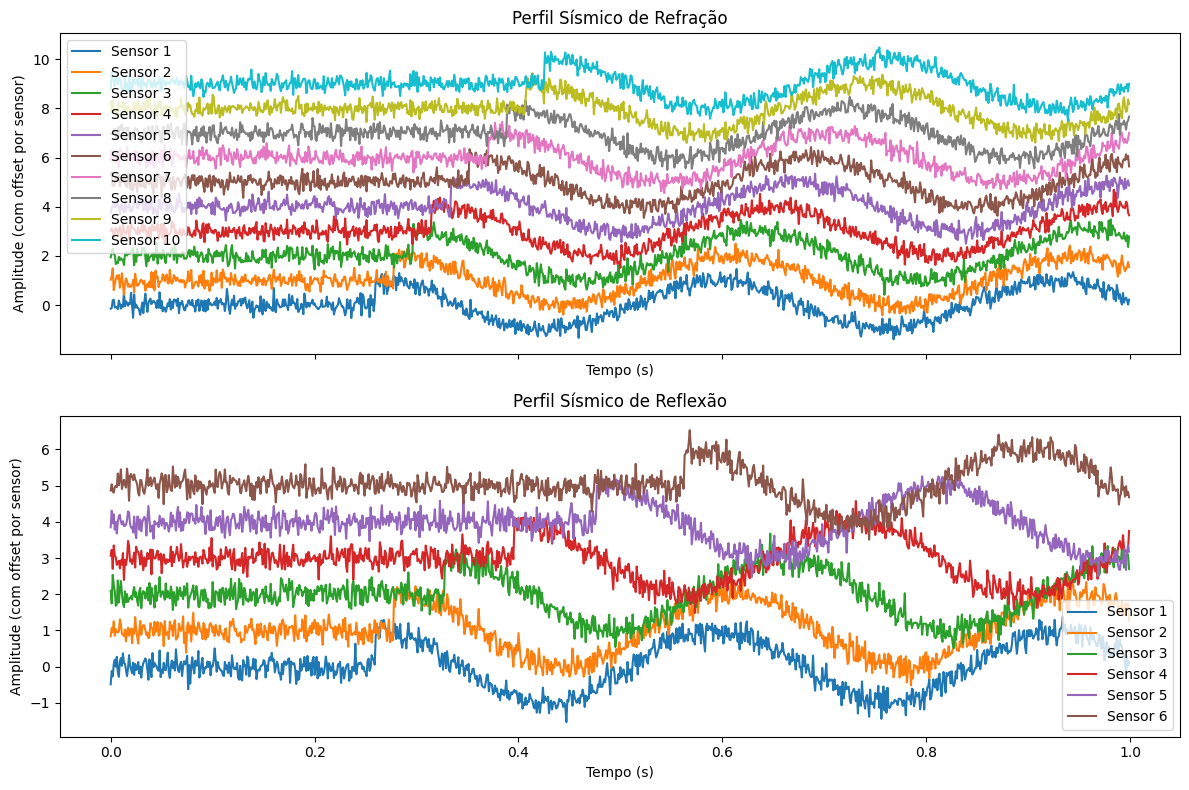

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def criar_sinais(tempos_chegada, cos_wave, t, dt, noise_level):
    sinais = []
    for t0 in tempos_chegada:
        sinal = np.zeros_like(t)
        idx = int(t0 / dt)
        if idx < len(t):
            sinal[idx:idx+len(cos_wave)] += cos_wave[:len(sinal)-idx]
        sinal += noise_level * np.random.randn(len(t))
        sinais.append(sinal)
    return np.array(sinais)

# Parâmetros gerais
fs = 1000  # Taxa de amostragem (Hz)
dt = 1 / fs  # Intervalo de amostragem
duration = 1.0  # Duração do sinal (s)
t = np.arange(0, duration, dt)  # Vetor de tempo
freq = 3  # Frequência do cossenoide (Hz)
h = 130  # Espessura da camada (m)
V1 = 1000  # Velocidade da camada 1 (m/s)
V2 = 3000  # Velocidade da camada 2 (m/s)
amplitude = 1.0  # Amplitude da cossenoide

# Sinal sísmico base (cossenoide)
signal = amplitude * np.cos(2 * np.pi * freq * t)

# --- Perfil de Refração ---
noise_level = 0.2
n_sensors_refraction = 10
x_refraction = np.linspace(0, 500, n_sensors_refraction)  # Distâncias dos sensores (m)
t_refraction = x_refraction / V2 + 2 * h / V1  # Tempos de percurso

# Criando perfil de refração usando a função criar_sinais
refraction_profile = criar_sinais(t_refraction, signal, t, dt, noise_level)

# --- Perfil de Reflexão ---
n_sensors_reflection = 6
x_reflection = np.linspace(0, 500, n_sensors_reflection)  # Distâncias dos sensores (m)
t_reflection = np.sqrt((2 * h / V1)**2 + (x_reflection / V1)**2)  # Tempos de percurso

# Criando perfil de reflexão usando a função criar_sinais
reflection_profile = criar_sinais(t_reflection, signal, t, dt, noise_level)

# --- Visualização dos perfis ---
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Perfil de Refração
for i, trace in enumerate(refraction_profile):
    axs[0].plot(t, trace + i, label=f"Sensor {i+1}")
axs[0].set_title("Perfil Sísmico de Refração")
axs[0].set_xlabel("Tempo (s)")
axs[0].set_ylabel("Amplitude (com offset por sensor)")
axs[0].legend()

# Perfil de Reflexão
for i, trace in enumerate(reflection_profile):
    axs[1].plot(t, trace + i, label=f"Sensor {i+1}")
axs[1].set_title("Perfil Sísmico de Reflexão")
axs[1].set_xlabel("Tempo (s)")
axs[1].set_ylabel("Amplitude (com offset por sensor)")
axs[1].legend()

plt.tight_layout()
plt.show()
